In [2]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import random

In [3]:
#db params

db_username_0 = 'postgres'
db_password_0 = 'Simulation2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulationdatainit'
table_name_0 = 'simulationsagg4'

In [4]:
#Creating connection and extracting data

connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df_0 = pd.read_sql(query, engine)

In [5]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.152642,596.36,18,111.118684,"[22.708000000000002, 176.794, 188.654, 228.528...","[22.708000000000002, 154.086, 11.8599999999999...",809812,1190188
1,2,0.152642,596.36,11,173.582333,"[104.665, 273.377, 323.64, 627.923, 826.485, 9...","[104.665, 168.712, 50.26299999999998, 304.283,...",956619,1043381
2,3,0.152642,596.36,16,122.044941,"[11.997, 105.0, 236.756, 412.651, 816.535, 876...","[11.997, 93.003, 131.756, 175.895, 403.8839999...",1197437,802563
3,4,0.152642,596.36,15,127.021812,"[178.076, 273.814, 371.882, 379.104, 672.871, ...","[178.076, 95.73800000000003, 98.06799999999998...",1285406,714594
4,5,0.152642,596.36,10,191.182636,"[19.189, 280.36400000000003, 376.455, 757.865,...","[19.189, 261.175, 96.09099999999995, 381.41, 3...",831082,1168918


In [6]:
len(df_0)

15000

In [7]:
unique_combos = df_0.drop_duplicates(subset=['epsilon', 'n_zero_square'])
unique_combos = unique_combos[['epsilon', 'n_zero_square']]
unique_combos.reset_index(drop=True, inplace=True)
unique_combos

,epsilon,n_zero_square
0,0.152642,596.360000
1,0.237142,944.933951
2,0.123943,318.864022
3,0.196791,691.477740
4,0.101057,226.553750
5,0.066420,112.202062


In [8]:
df_0 = df_0[(df_0['epsilon'] != 0.237141981129506) & (df_0['n_zero_square'] != 944.933950781621)]
df_0 = df_0[(df_0['epsilon'] != 0.10105697229623531) & (df_0['n_zero_square'] != 226.55375007277567)]
df_0 = df_0[(df_0['epsilon'] != .06641994156659121) & (df_0['n_zero_square'] != 112.2020615473713)]

In [9]:
unique_combos = df_0.drop_duplicates(subset=['epsilon', 'n_zero_square'])
unique_combos = unique_combos[['epsilon', 'n_zero_square']]
unique_combos.reset_index(drop=True, inplace=True)
unique_combos

,epsilon,n_zero_square
0,0.152642,596.360000
1,0.123943,318.864022
2,0.196791,691.477740


In [10]:
#Defining common filter functions

def any_values_less_than_5(duration_list):
    return any(value < 5 for value in duration_list)

def sum_values_less_than_5(duration_list):
    return sum(value < 5 for value in duration_list)

def update_reversal_durations(df, simulation_end):
    for index, row in df.iterrows():
        full_range = [0] + row['reversal_times'] + [simulation_end]
        durations = [round(full_range[i + 1] - full_range[i], 2) for i in range(len(row['reversal_times']) + 1)]
        df.at[index, 'reversal_durations'] = durations
    return df

def calculate_average_reversal_time_excluding_last(reversal_durations):
    average_reversal_time = np.mean(reversal_durations[:-1])
    return average_reversal_time

def calculate_average_reversal_time(reversal_durations):
    average_reversal_time = np.mean(reversal_durations)
    return average_reversal_time

In [11]:
#Changing df_0 into cleaned_df_0

df_0 = df_0[(df_0['reversal_count'] > 0)]
df_0[((df_0['positive_values'] + df_0['negative_values']) > 2000000)]
df_0 = update_reversal_durations(df_0, 2000)
df_0['average_reversal_time'] = df_0['reversal_durations'].apply(calculate_average_reversal_time)
df_0['average_reversal_time_excluding_last'] = df_0['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_0_AnyLessThan5 = df_0['reversal_durations'].apply(any_values_less_than_5)
df_0['any_less_than_5'] = df_0_AnyLessThan5
df_0[(df_0['any_less_than_5'] == True)].head()
df_0_cleaned = df_0
df_0_cleaned.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
0,1,0.152642,596.36,18,105.263158,"[22.708000000000002, 176.794, 188.654, 228.528...","[22.71, 154.09, 11.86, 39.87, 203.38, 98.21, 1...",809812,1190188,104.930556,False
1,2,0.152642,596.36,11,166.666667,"[104.665, 273.377, 323.64, 627.923, 826.485, 9...","[104.67, 168.71, 50.26, 304.28, 198.56, 117.39...",956619,1043381,174.273636,False
2,3,0.152642,596.36,16,117.647059,"[11.997, 105.0, 236.756, 412.651, 816.535, 876...","[12.0, 93.0, 131.76, 175.9, 403.88, 59.63, 55....",1197437,802563,120.327500,False
3,4,0.152642,596.36,15,125.000000,"[178.076, 273.814, 371.882, 379.104, 672.871, ...","[178.08, 95.74, 98.07, 7.22, 293.77, 34.54, 11...",1285406,714594,131.176667,False
4,5,0.152642,596.36,10,181.819091,"[19.189, 280.36400000000003, 376.455, 757.865,...","[19.19, 261.18, 96.09, 381.41, 361.49, 300.39,...",831082,1168918,189.700000,False


In [12]:
len(df_0_cleaned)

7500

In [13]:
df_1 = df_0_cleaned[(df_0_cleaned['epsilon'] == 0.1526418) & (df_0_cleaned['n_zero_square'] == 596.36)]
df_2 = df_0_cleaned[(df_0_cleaned['epsilon'] == 0.12394270273516) & (df_0_cleaned['n_zero_square'] == 318.864021731039)]
df_3 = df_0_cleaned[(df_0_cleaned['epsilon'] == .1967910497548276) & (df_0_cleaned['n_zero_square'] == 691.4777400853942)]


In [14]:
len(df_1)

2500

In [15]:
len(df_2)

2500

In [16]:
len(df_3)

2500

In [17]:
hist_data_1 = [item for sublist in df_1.apply(lambda row: row['reversal_durations'][:-1], axis = 1) for item in sublist]
len(hist_data_1)

32372

In [18]:
hist_data_2 = [item for sublist in df_2.apply(lambda row: row['reversal_durations'][:-1], axis = 1) for item in sublist]
len(hist_data_2) 

74493

In [19]:
hist_data_3 = [item for sublist in df_3.apply(lambda row: row['reversal_durations'][:-1], axis = 1) for item in sublist]
len(hist_data_3)

65144

In [20]:
# probablity_hist_data_1 = [i/len()]

In [21]:
hist_data_1_no_tail = [i for i in hist_data_1 if i > 5]
len(hist_data_1_no_tail)

31879

In [22]:
hist_data_2_no_tail = [i for i in hist_data_2 if i > 5]
len(hist_data_2_no_tail)

72211

In [23]:
hist_data_3_no_tail = [i for i in hist_data_3 if i > 5]
len(hist_data_3_no_tail)

63139

### Plots Without Averaging

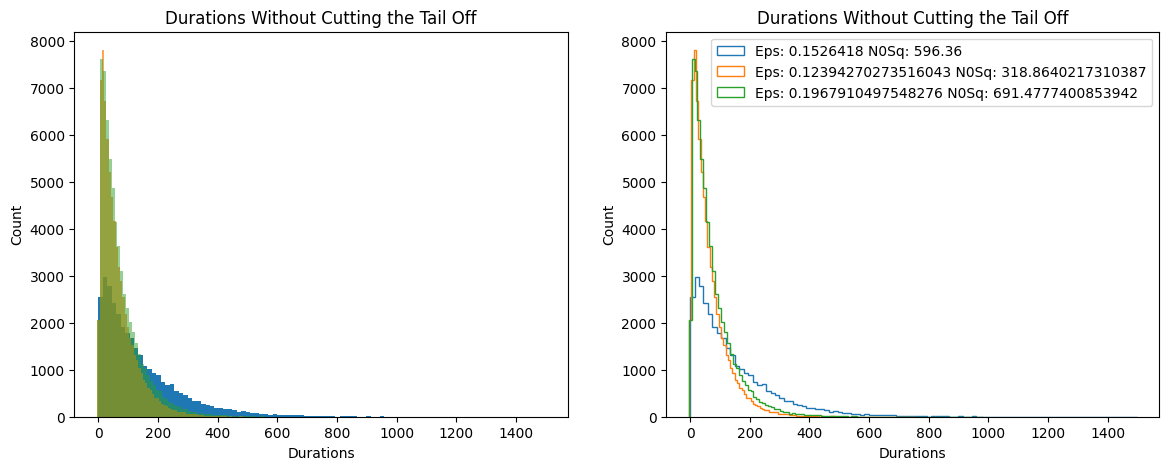

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_1, bins = 100, label = 'Eps: 0.1526418 N0Sq: 596.36', alpha = 1)
ax[0].hist(hist_data_2, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = .7)
ax[0].hist(hist_data_3, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = .5)

ax[0].set_title("Durations Without Cutting the Tail Off")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_1, bins = 100, label = 'Eps: 0.1526418 N0Sq: 596.36', alpha = 1, histtype= 'step')
ax[1].hist(hist_data_2, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1, histtype= 'step')
ax[1].hist(hist_data_3, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1, histtype= 'step')

ax[1].set_title("Durations Without Cutting the Tail Off")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

## Probability Plot

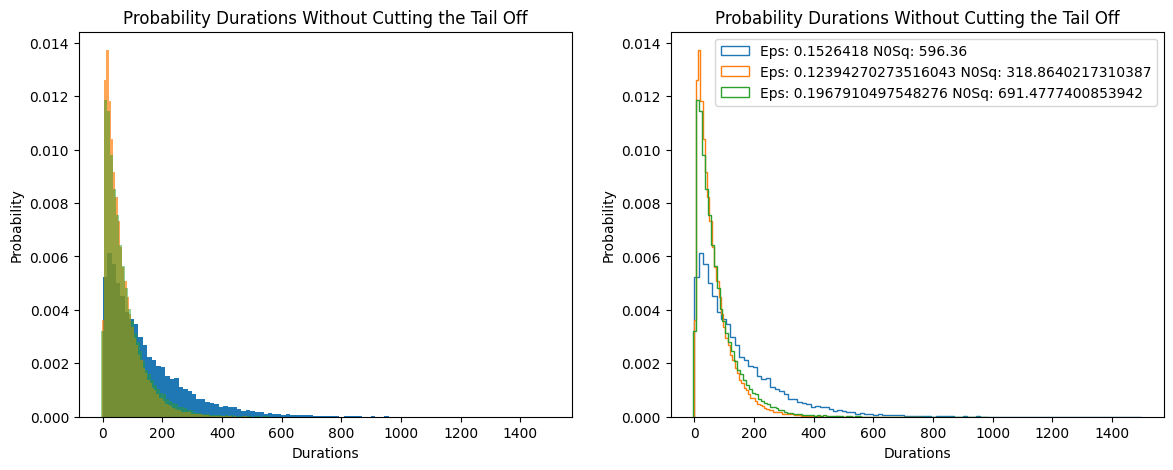

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_1, bins = 100, label = 'Eps: 0.1526418 N0Sq: 596.36', alpha = 1, density = 'True')
ax[0].hist(hist_data_2, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = .7, density = 'True')
ax[0].hist(hist_data_3, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = .5, density = 'True')

ax[0].set_title("Probability Durations Without Cutting the Tail Off")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Probability")

ax[1].hist(hist_data_1, bins = 100, label = 'Eps: 0.1526418 N0Sq: 596.36', alpha = 1, histtype= 'step', density = 'True')
ax[1].hist(hist_data_2, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1, histtype= 'step', density = 'True')
ax[1].hist(hist_data_3, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1, histtype= 'step', density = 'True')

ax[1].set_title("Probability Durations Without Cutting the Tail Off")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Probability")

plt.legend(loc='upper right')
plt.show()

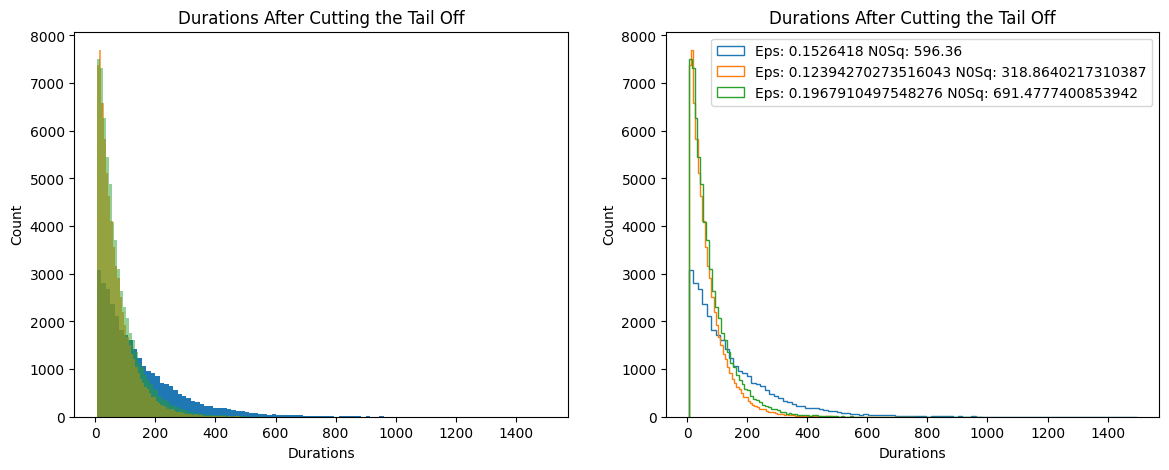

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_1_no_tail, bins = 100, label = 'Eps: 0.1526418 N0Sq: 596.36', alpha = 1)
ax[0].hist(hist_data_2_no_tail, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = .7)
ax[0].hist(hist_data_3_no_tail, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = .5)

ax[0].set_title("Durations After Cutting the Tail Off")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_1_no_tail, bins = 100, label = 'Eps: 0.1526418 N0Sq: 596.36', alpha = 1, histtype= 'step')
ax[1].hist(hist_data_2_no_tail, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1, histtype= 'step')
ax[1].hist(hist_data_3_no_tail, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1, histtype= 'step')

ax[1].set_title("Durations After Cutting the Tail Off")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

## Probability Plot

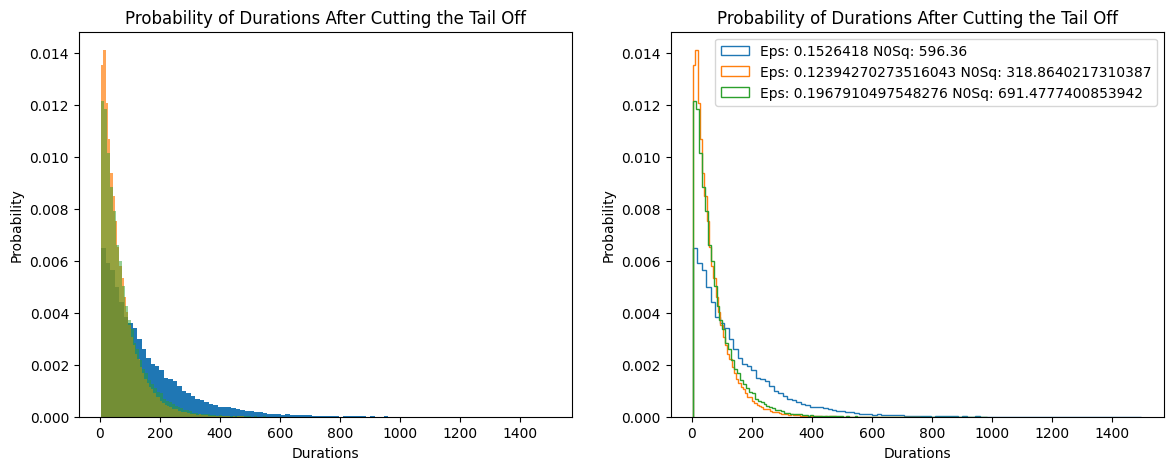

In [58]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_1_no_tail, bins = 100, label = 'Eps: 0.1526418 N0Sq: 596.36', alpha = 1, density = 'True')
ax[0].hist(hist_data_2_no_tail, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = .7, density = 'True')
ax[0].hist(hist_data_3_no_tail, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = .5, density = 'True')

ax[0].set_title("Probability of Durations After Cutting the Tail Off")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Probability")

ax[1].hist(hist_data_1_no_tail, bins = 100, label = 'Eps: 0.1526418 N0Sq: 596.36', alpha = 1, histtype= 'step', density = 'True')
ax[1].hist(hist_data_2_no_tail, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1, histtype= 'step', density = 'True')
ax[1].hist(hist_data_3_no_tail, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1, histtype= 'step', density = 'True')

ax[1].set_title("Probability of Durations After Cutting the Tail Off")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Probability")

plt.legend(loc='upper right')
plt.show()

## Plots After Averaging

In [27]:
hist_data_1_average = [i for i in df_1['average_reversal_time_excluding_last']]
hist_data_2_average = [i for i in df_2['average_reversal_time_excluding_last']]
hist_data_3_average = [i for i in df_3['average_reversal_time_excluding_last']]

In [28]:
len(hist_data_1_average)

2500

In [29]:
len(hist_data_2_average)

2500

In [30]:
len(hist_data_3_average)

2500

In [31]:
hist_data_1_average_no_tail = [i for i in hist_data_1_average if i > 5]
len(hist_data_1_average_no_tail)

2500

In [32]:
hist_data_2_average_no_tail = [i for i in hist_data_2_average if i > 5]
len(hist_data_2_average_no_tail)

2500

In [33]:
hist_data_3_average_no_tail = [i for i in hist_data_3_average if i > 5]
len(hist_data_3_average_no_tail)

2500

##### No need for seperate analysis, as there are no averages below 5 time units.

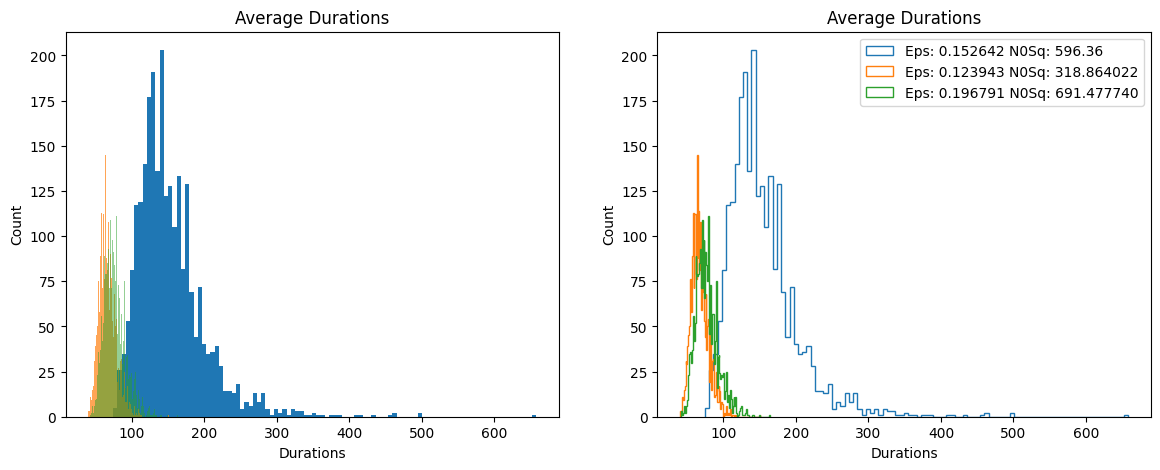

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_1_average, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1)
ax[0].hist(hist_data_2_average, bins = 100, label = 'Eps: 0.123943 N0Sq: 318.864022', alpha = .7)
ax[0].hist(hist_data_3_average, bins = 100, label = 'Eps: 0.196791 N0Sq: 691.477740', alpha = .5)

ax[0].set_title("Average Durations")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_1_average, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1, histtype= 'step')
ax[1].hist(hist_data_2_average, bins = 100, label = 'Eps: 0.123943 N0Sq: 318.864022', alpha = 1, histtype= 'step')
ax[1].hist(hist_data_3_average, bins = 100, label = 'Eps: 0.196791 N0Sq: 691.477740', alpha = 1, histtype= 'step')

ax[1].set_title("Average Durations")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

## Checking For Convergence

In [35]:
# The List Splitter Function

def split_list_randomly(l):
    random.shuffle(l)

    midpoint = len(l)//2

    first_half = l[:midpoint]
    second_half = l[midpoint:]

    return first_half, second_half

In [36]:
hist_data_1_half1, hist_data_1_half2 = split_list_randomly(hist_data_1)
hist_data_2_half1, hist_data_2_half2 = split_list_randomly(hist_data_2)
hist_data_3_half1, hist_data_3_half2 = split_list_randomly(hist_data_3)

In [37]:
len(hist_data_1_half1), len(hist_data_1_half2)

(16186, 16186)

In [38]:
len(hist_data_2_half1), len(hist_data_2_half2)

(37246, 37247)

In [39]:
len(hist_data_3_half1), len(hist_data_3_half2)

(32572, 32572)

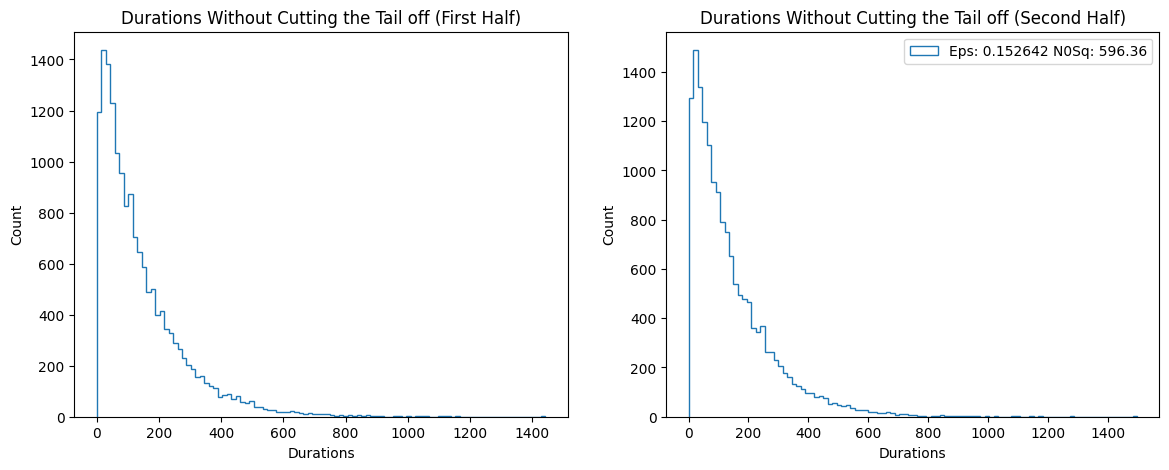

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_1_half1, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1,histtype = 'step')


ax[0].set_title("Durations Without Cutting the Tail off (First Half)")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_1_half2, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1, histtype = 'step')


ax[1].set_title("Durations Without Cutting the Tail off (Second Half)")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

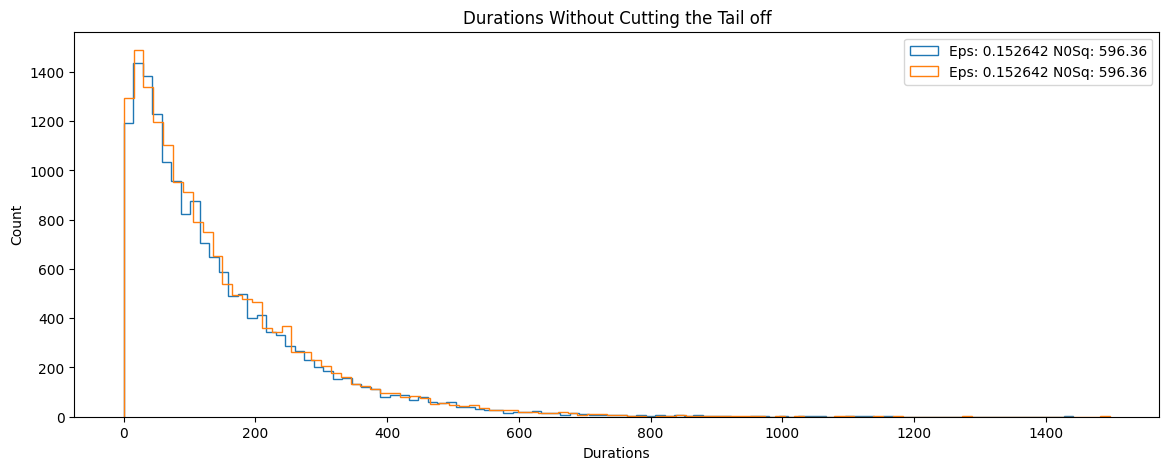

In [41]:
fig, ax = plt.subplots(figsize = (14, 5))

ax.hist(hist_data_1_half1, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1,histtype = 'step')
ax.hist(hist_data_1_half2, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1, histtype = 'step')

ax.set_title("Durations Without Cutting the Tail off")
ax.set_xlabel("Durations")
ax.set_ylabel("Count")



plt.legend(loc='upper right')
plt.show()

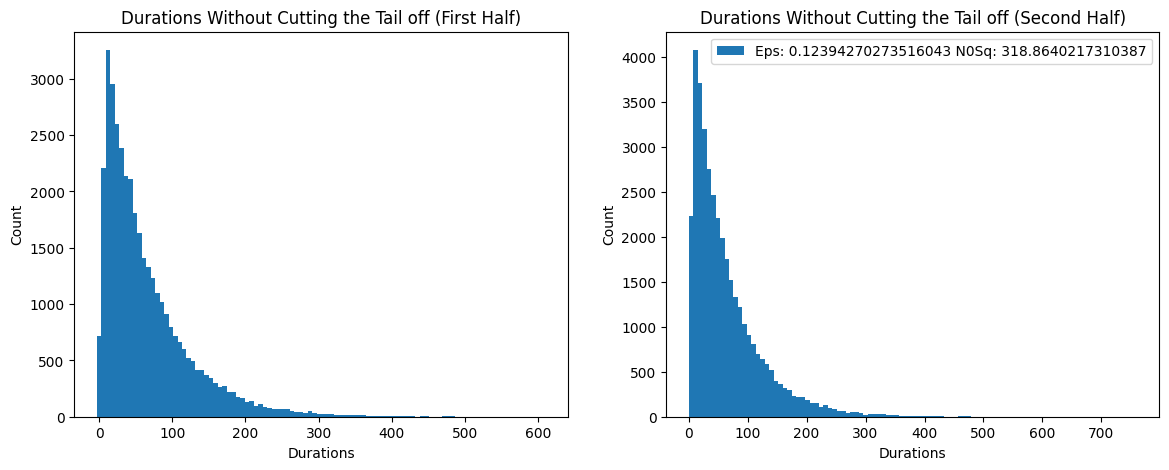

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_2_half1, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1)


ax[0].set_title("Durations Without Cutting the Tail off (First Half)")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_2_half2, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1)


ax[1].set_title("Durations Without Cutting the Tail off (Second Half)")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

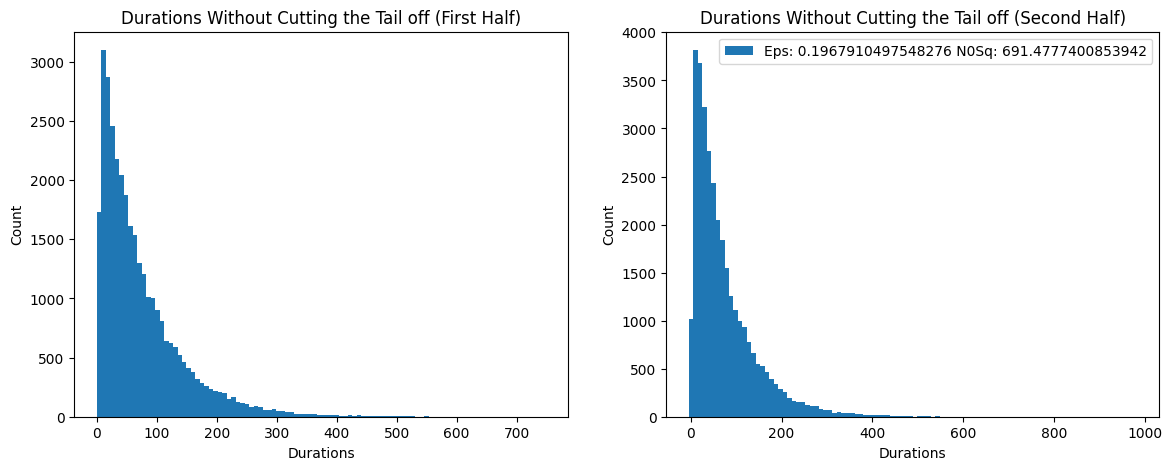

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_3_half1, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1)


ax[0].set_title("Durations Without Cutting the Tail off (First Half)")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_3_half2, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1)


ax[1].set_title("Durations Without Cutting the Tail off (Second Half)")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

In [44]:
hist_data_1_no_tail_half1, hist_data_1_no_tail_half2 = split_list_randomly(hist_data_1_no_tail)
hist_data_2_no_tail_half1, hist_data_2_no_tail_half2 = split_list_randomly(hist_data_2_no_tail)
hist_data_3_no_tail_half1, hist_data_3_no_tail_half2 = split_list_randomly(hist_data_3_no_tail)

In [45]:
len(hist_data_1_no_tail_half1), len(hist_data_1_no_tail_half2)

(15939, 15940)

In [46]:
len(hist_data_2_no_tail_half1), len(hist_data_2_no_tail_half2)

(36105, 36106)

In [47]:
len(hist_data_3_no_tail_half1), len(hist_data_3_no_tail_half2)

(31569, 31570)

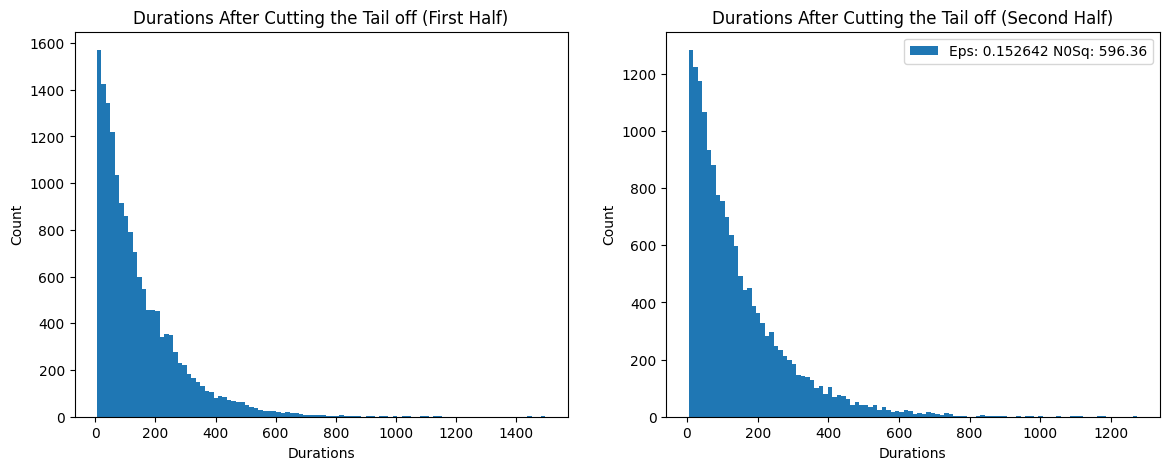

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_1_no_tail_half1, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1)


ax[0].set_title("Durations After Cutting the Tail off (First Half)")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_1_no_tail_half2, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1)


ax[1].set_title("Durations After Cutting the Tail off (Second Half)")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

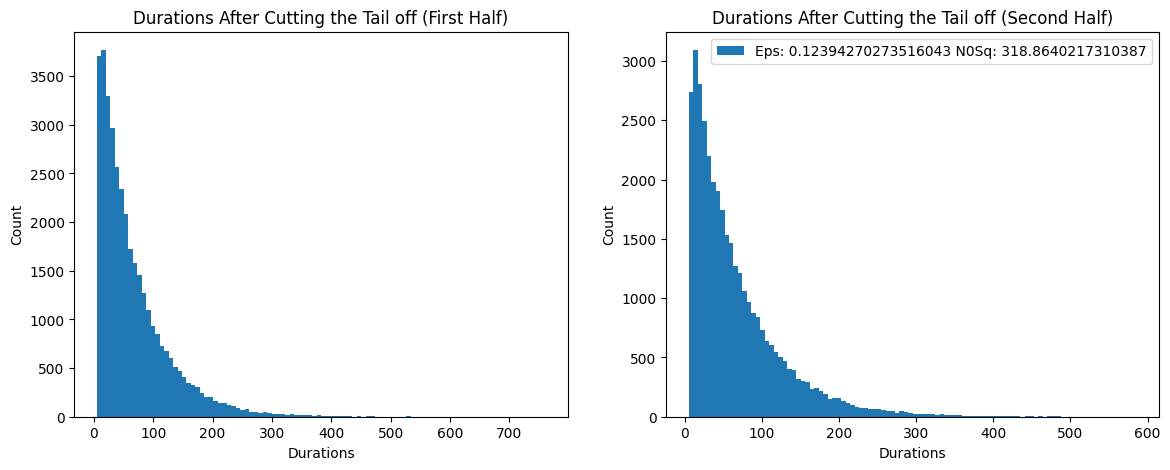

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_2_no_tail_half1, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1)


ax[0].set_title("Durations After Cutting the Tail off (First Half)")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_2_no_tail_half2, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1)


ax[1].set_title("Durations After Cutting the Tail off (Second Half)")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

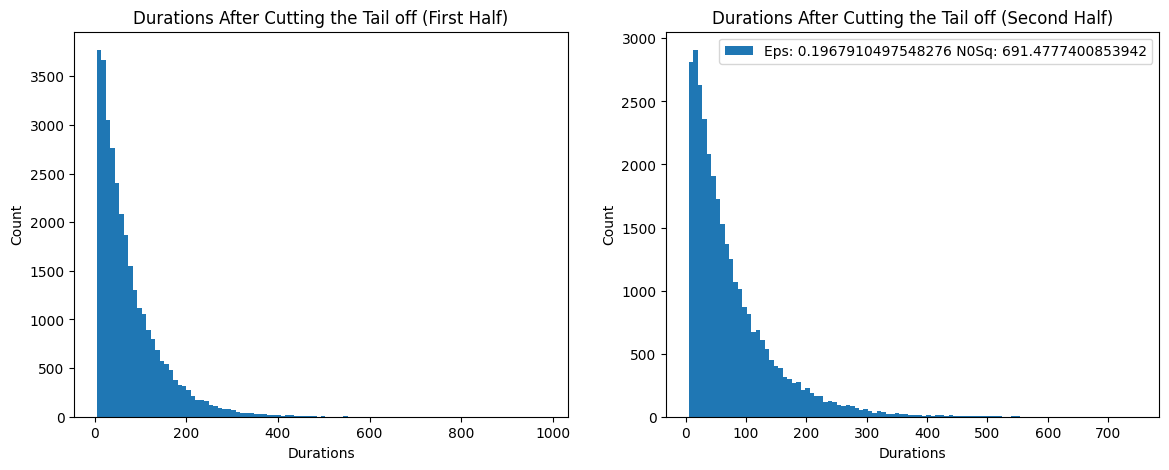

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_3_no_tail_half1, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1)


ax[0].set_title("Durations After Cutting the Tail off (First Half)")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_3_no_tail_half2, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1)


ax[1].set_title("Durations After Cutting the Tail off (Second Half)")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

In [51]:
hist_data_1_average_half1, hist_data_1_average_half2 = split_list_randomly(hist_data_1_average)
hist_data_2_average_half1, hist_data_2_average_half2 = split_list_randomly(hist_data_2_average)
hist_data_3_average_half1, hist_data_3_average_half2 = split_list_randomly(hist_data_3_average)

In [52]:
len(hist_data_1_average_half1), len(hist_data_1_average_half2)

(1250, 1250)

In [53]:
len(hist_data_2_average_half1), len(hist_data_2_average_half2)

(1250, 1250)

In [54]:
len(hist_data_3_average_half1), len(hist_data_3_average_half2)

(1250, 1250)

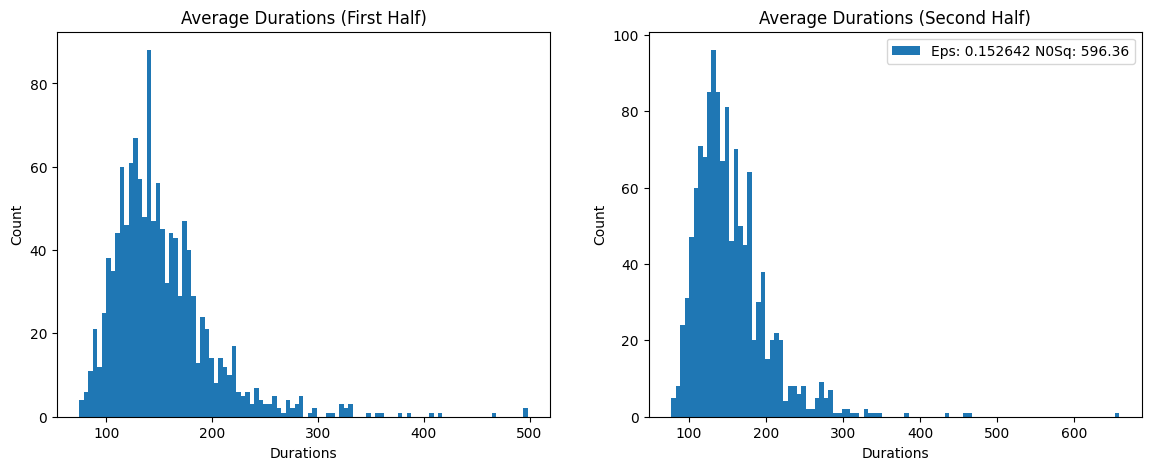

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_1_average_half1, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1)


ax[0].set_title("Average Durations (First Half)")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_1_average_half2, bins = 100, label = 'Eps: 0.152642 N0Sq: 596.36', alpha = 1)


ax[1].set_title("Average Durations (Second Half)")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

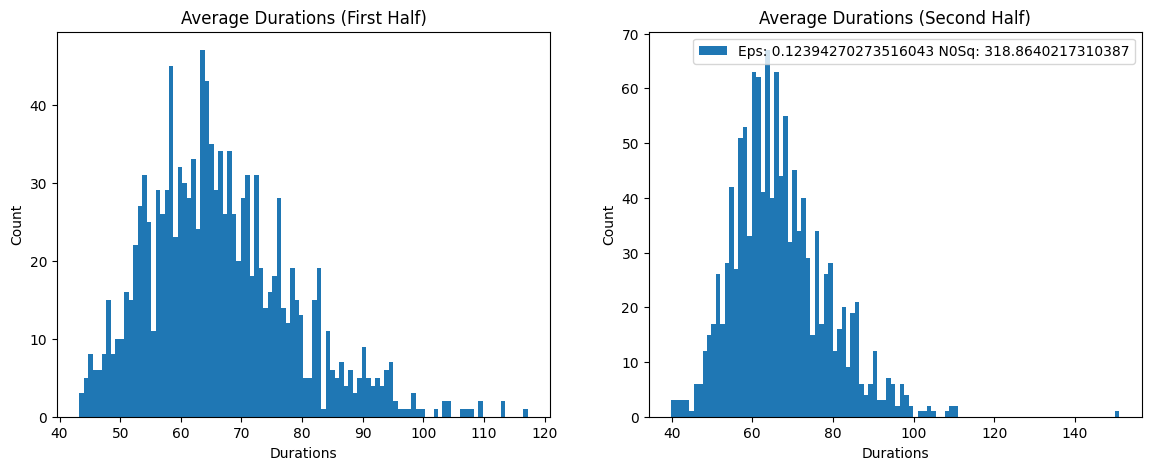

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_2_average_half1, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1)


ax[0].set_title("Average Durations (First Half)")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_2_average_half2, bins = 100, label = 'Eps: 0.12394270273516043 N0Sq: 318.8640217310387', alpha = 1)


ax[1].set_title("Average Durations (Second Half)")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()

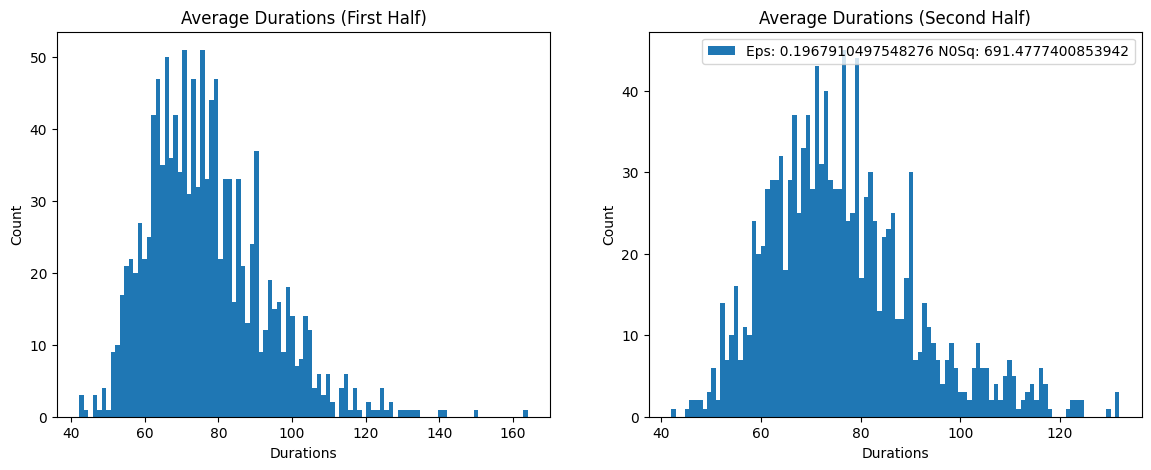

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(hist_data_3_average_half1, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1)


ax[0].set_title("Average Durations (First Half)")
ax[0].set_xlabel("Durations")
ax[0].set_ylabel("Count")

ax[1].hist(hist_data_3_average_half2, bins = 100, label = 'Eps: 0.1967910497548276 N0Sq: 691.4777400853942', alpha = 1)


ax[1].set_title("Average Durations (Second Half)")
ax[1].set_xlabel("Durations")
ax[1].set_ylabel("Count")

plt.legend(loc='upper right')
plt.show()